<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_CNN_CIFAR10_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

acc_000
Epoch 1/5
313/313 - 4s - loss: 1.5779 - accuracy: 0.4241 - val_loss: 1.2960 - val_accuracy: 0.5279 - 4s/epoch - 13ms/step
Epoch 2/5
313/313 - 3s - loss: 1.1720 - accuracy: 0.5796 - val_loss: 1.1322 - val_accuracy: 0.6004 - 3s/epoch - 10ms/step
Epoch 3/5
313/313 - 3s - loss: 0.9805 - accuracy: 0.6523 - val_loss: 0.9871 - val_accuracy: 0.6488 - 3s/epoch - 9ms/step
Epoch 4/5
313/313 - 3s - loss: 0.8198 - accuracy: 0.7128 - val_loss: 0.9464 - val_accuracy: 0.6712 - 3s/epoch - 10ms/step
Epoch 5/5
313/313 - 3s - loss: 0.7042 - accuracy: 0.7540 - val_loss: 0.8482 - val_accuracy: 0.7100 - 3s/epoch - 10ms/step
Epoch 1/5
313/313 - 4s - loss: 1.5843 - accuracy: 0.4218 - val_loss: 1.2946 - val_accuracy: 0.5271 - 4s/epoch - 12ms/step
Epoch 2/5
313/313 - 3s - loss: 1.1624 - accuracy: 0.5864 - val_loss: 1.2288 - val_accuracy: 0.5692 - 3s/epoch - 10ms/step
Epoch 3/5
313/313 - 3s - loss: 0.9699 - accuracy: 0.6612 - val_loss: 0.9954 - val_accuracy: 0.6574 - 3s/epoch - 9ms/step
Epoch 4/5
313/313 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
391/391 - 21s - loss: 1.6038 - accuracy: 0.4143 - val_loss: 1.3008 - val_accuracy: 0.5374 - 21s/epoch - 54ms/step
Epoch 2/5
391/391 - 20s - loss: 1.2372 - accuracy: 0.5571 - val_loss: 1.1294 - val_accuracy: 0.5987 - 20s/epoch - 52ms/step
Epoch 3/5
391/391 - 20s - loss: 1.0746 - accuracy: 0.6200 - val_loss: 0.9801 - val_accuracy: 0.6524 - 20s/epoch - 52ms/step
Epoch 4/5
391/391 - 20s - loss: 0.9717 - accuracy: 0.6586 - val_loss: 0.9305 - val_accuracy: 0.6742 - 20s/epoch - 51ms/step
Epoch 5/5
391/391 - 21s - loss: 0.9029 - accuracy: 0.6830 - val_loss: 0.8625 - val_accuracy: 0.7017 - 21s/epoch - 53ms/step
Epoch 1/5
391/391 - 21s - loss: 1.6394 - accuracy: 0.3997 - val_loss: 1.2959 - val_accuracy: 0.5360 - 21s/epoch - 54ms/step
Epoch 2/5
391/391 - 20s - loss: 1.2761 - accuracy: 0.5424 - val_loss: 1.1290 - val_accuracy: 0.6009 - 20s/epoch - 52ms/step
Epoch 3/5
391/391 - 21s - loss: 1.0996 - accuracy: 0.6126 - val_loss: 0.9820 - val_accuracy: 0.6550 - 21s/epoch - 53ms/step
Epoch 4/

{'boxes': [<matplotlib.lines.Line2D at 0x7f8934f53090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a3c1c7290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a2403e190>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8a2403e510>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8a2420ad50>,
  <matplotlib.lines.Line2D at 0x7f893461ae90>]}

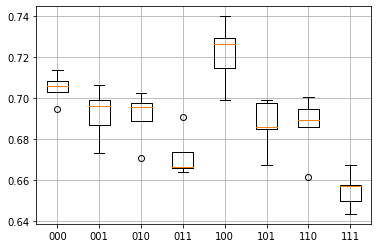

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

# [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125) 해결하기 위해 코드 추가
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz=128
n_epoch=5
k=5 # k-folds

# 하이퍼 매개변수에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(data_gen,dropout_rate,l2_reg):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg)))

        # 신경망을 학습하고 정확률 평가
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        if data_gen:
            generator=ImageDataGenerator(rotation_range=3.0,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
            cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
        else:
            cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch, validation_data=(x_test,y_test),verbose=2)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 하이퍼 매개변수를 달리 하며 신경망 모델을 평가
print('acc_000'); acc_000=cross_validation(False,[0.0,0.0,0.0],0.0)
print('acc_001'); acc_001=cross_validation(False,[0.0,0.0,0.0],0.01)
print('acc_010'); acc_010=cross_validation(False,[0.25,0.25,0.5],0.0)
print('acc_011'); acc_011=cross_validation(False,[0.25,0.25,0.5],0.01)
print('acc_100'); acc_100=cross_validation(True,[0.0,0.0,0.0],0.0)
print('acc_101'); acc_101=cross_validation(True,[0.0,0.0,0.0],0.01)
print('acc_110'); acc_110=cross_validation(True,[0.25,0.25,0.5],0.0)
print('acc_111'); acc_111=cross_validation(True,[0.25,0.25,0.5],0.01)

print("출력 형식: [Data augmentation-Dropout-l2 regularizer] (교차검증 시도/평균)")
print("[000] (",acc_000,"/",np.array(acc_000).mean(),")")
print("[001] (",acc_001,"/",np.array(acc_001).mean(),")")
print("[010] (",acc_010,"/",np.array(acc_010).mean(),")")
print("[011] (",acc_011,"/",np.array(acc_011).mean(),")")
print("[100] (",acc_100,"/",np.array(acc_100).mean(),")")
print("[101] (",acc_101,"/",np.array(acc_101).mean(),")")
print("[110] (",acc_110,"/",np.array(acc_110).mean(),")")
print("[111] (",acc_111,"/",np.array(acc_111).mean(),")")

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111],labels=["000","001","010","011","100","101","110","111"])
# plt.boxplot([acc_000,acc_001],labels=["000","001"])